In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
numRepeat = 10
maxGenome = 10000
n = int(maxGenome * 0.98)


rd_base_c172 = "C:/Capstone/Capstone_Downloads/SHO_comp_LR/Base_c172/max_genome_{}".format(maxGenome)
rd_base_coal = "C:/Capstone/Capstone_Downloads/SHO_comp_LR/Base_coal/max_genome_{}".format(maxGenome)
rd_base_wind = "C:/Capstone/Capstone_Downloads/SHO_comp_LR/Base_wind/max_genome_{}".format(maxGenome)

rd_sho_all_c172 = "E:/Capstone/Capstone_Downloads/sho_all/sho_all_c172/max_genome_{}".format(maxGenome)
rd_sho_all_coal = "E:/Capstone/Capstone_Downloads/sho_all/sho_all_coal/max_genome_{}".format(maxGenome)
rd_sho_all_wind = "E:/Capstone/Capstone_Downloads/sho_all/sho_all_wind/max_genome_{}".format(maxGenome)

# rd_sho_lr_c172 = "E:/Capstone/Capstone_Downloads/sho_lr/sho_lr_c172/max_genome_{}".format(maxGenome)
# rd_sho_lr_coal = "E:/Capstone/Capstone_Downloads/sho_lr/sho_lr_coal/max_genome_{}".format(maxGenome)
# rd_sho_lr_wind = "E:/Capstone/Capstone_Downloads/sho_lr/sho_lr_wind/max_genome_{}".format(maxGenome)

# rd_sho_cr_c172 = "E:/Capstone/Capstone_Downloads/sho_lr_cr/sho_lr_cr_c172/max_genome_{}".format(maxGenome)



# rd_sho_lr_is_c172 = "C:/Capstone/Capstone_Downloads/SHO_comp_LR/sho_lr_c172/max_genome_{}".format(maxGenome)
# rd_sho_lr_is_coal = "C:/Capstone/Capstone_Downloads/SHO_comp_LR/sho_lr_coal/max_genome_{}".format(maxGenome)
# rd_sho_lr_is_wind = "C:/Capstone/Capstone_Downloads/SHO_comp_LR/sho_lr_wind/max_genome_{}".format(maxGenome)



MSE Min for experiment:  base_c172 :  0.000543602
MSE avg for experiment:  base_c172 :  0.002789635358795918

MSE Min for experiment:  sho_c172 :  0.000370747
MSE avg for experiment:  sho_c172 :  0.0009512024895102038



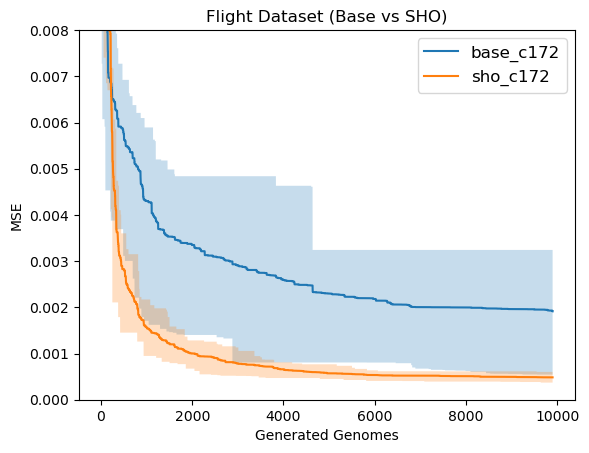

In [7]:
plt.cla()
plt.close()


#plt.figure(figsize=(20,15))

for experiment in [1,4]:
    
    generation = []
    mse = []
    
    if  experiment == 1:
        resultDir = rd_base_c172
        experiment_name = 'base_c172'
    elif experiment == 2:
        resultDir = rd_base_coal
        experiment_name = 'Base_coal'
    elif experiment == 3:
        resultDir = rd_base_wind
        experiment_name = 'base_wind'
    elif experiment == 4:
        resultDir = rd_sho_all_c172
        experiment_name = 'sho_c172'
    elif experiment == 5:
        resultDir = rd_sho_all_coal
        experiment_name = 'sho_coal'
    elif experiment == 6:
        resultDir = rd_sho_all_wind
        experiment_name = 'sho_wind'
    # elif experiment == 7:
    #     resultDir = rd_sho_lr_c172
    #     experiment_name = 'sho_lr_c172'
    # elif experiment == 8:
    #     resultDir = rd_sho_lr_coal
    #     experiment_name = 'sho_lr_coal'
    # elif experiment == 9:
    #     resultDir = rd_sho_lr_wind
    #     experiment_name = 'sho_lr_wind'
    # elif experiment == 10:
    #     resultDir = rd_sho_lr_is_c172
    #     experiment_name = 'sho_lr_is_c172'
        
    for repeat in range(numRepeat):
        
        data = np.genfromtxt(resultDir+'/island_10/{}/fitness_log.csv'.format(repeat), delimiter=',', skip_header=True, usecols=(0,4))[0:n]
        generation.append(data[:,0])
        mse.append(data[:,1])
        #plt.plot(np.average(generation, axis = 0), np.average(mse, axis=0), label='experiment {}'.format(experiment_name))
        #plt.fill_between(np.average(generation, axis = 0), np.min(mse, axis=0), np.max(mse, axis=0), alpha=.2)

        

    plt.plot(np.average(generation, axis = 0), np.average(mse, axis=0), label='{}'.format(experiment_name))
    plt.fill_between(np.average(generation, axis = 0), np.min(mse, axis=0), np.max(mse, axis=0), alpha=.25)
    print("MSE Min for experiment: ",experiment_name,': ',np.min(mse))
    # print("MSE Max for experiment: ",experiment_name,': ',np.max(mse))
    print("MSE avg for experiment: ",experiment_name,': ',np.average(mse))
    # print("MSE median for experiment: ",experiment_name,': ',np.median(mse))
    # print("MSE Q1 for experiment: ",experiment_name,': ',np.quantile(mse,0.25))
    # print("MSE Q3 for experiment: ",experiment_name,': ',np.quantile(mse,0.75))
    print()
    #plt.fill_between(np.average(generation, axis = 0), np.min(mse, axis=0), np.max(mse, axis=0), alpha=.2)



plt.ylim([0.0,0.008])
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.rc('legend',fontsize='12')
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Generated Genomes")
title = "Flight Dataset (Base vs SHO)"
name = "plot_example"
plt.title(title)
plt.savefig(name + ".png",bbox_inches='tight')  